<a href="https://colab.research.google.com/github/C-Designer/Study/blob/main/Securities_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas-datareader
!pip install yfinance

     |████████████████████████████████| 5.5MB 17.7MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22616 sha256=308b37289822eb83b3ba9c4676f42d4a5d9df3884d98434fa832f8d40fc9294c
  Stored in directory: /root/.cache/pip/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
# 파이썬 증권데이터 분석 - 김홍주

from pandas_datareader import data as pdr
from scipy import stats as st

import matplotlib.pyplot as plt
import yfinance as yf

yf.pdr_override()

### 연평균 성장률 (CAGR : Compound Annual Growth Rate)
복합 연평균 성장률, 연복리 수익률 이라고도 부른다.
1년 동안 얼마 만큼씩 증가하는지 나타내는 값
투자수익률, 판매수량, 사용자 증가율 들을 나타낼때 쓴다.

In [ ]:
def cagr(first, last, years):
  print('SEC CAGR : {:.2%}'.format((last / first) ** (1 / years) - 1))

삼성전자는 1998년 4월 27일 65,300 원이던 주가가 액면 분할 직전인 2018년 4월 27일 2,669,000원이 되기까지, 정확히 20년 동안 무려 4,087% 상승했다.
이기간 연평균 성장률을 구하면 20.38%가 나온다.

In [ ]:
cagr(65300, 2669000, 20)

SEC CAGR : 20.38%


In [ ]:
# cagr 수치가 맞는지 확인해보자
cagr = 65300

for i in range(20):
  cagr += cagr * 20.38 / 100

cagr # 2,669,000원에 근사하게 나옴

2666858.425345477

In [ ]:
# 국내, 해외 시가총액 1위 불러오기

sec = pdr.get_data_yahoo('005930.KS', start= '2018-05-04') # 삼성전자
aapl = pdr.get_data_yahoo('AAPL', start= '2018-05-04') # 애플

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
sec.head()
# Volume = 거래량
# Adj Close = 수정 종가

# 액면분할 이후 종가(close)와 수정 종가가 같아야하는데, 국내주식에 대한 액면분할 처리가 제대로 되지 않음

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-05-04,53000.0,53900.0,51800.0,51900.0,47034.734375,39565391
2018-05-08,52600.0,53200.0,51900.0,52600.0,47669.113281,23104720
2018-05-09,52600.0,52800.0,50900.0,50900.0,46128.468750,16128305
2018-05-10,51700.0,51700.0,50600.0,51600.0,46762.851562,13905263
2018-05-11,52000.0,52200.0,51200.0,51300.0,46490.968750,10314997


In [ ]:
tmp_aapl = aapl.drop(columns= 'Volume')
tmp_aapl.tail()
# volume까지 표기하면 줄바꿈이 되어 보기에 좋지않음

,Open,High,Low,Close,Adj Close
Date,,,,,
2021-01-25,143.070007,145.089996,136.539993,142.919998,142.919998
2021-01-26,143.600006,144.300003,141.369995,143.160004,143.160004
2021-01-27,143.429993,144.300003,140.410004,142.059998,142.059998
2021-01-28,139.520004,141.990005,136.699997,137.089996,137.089996
2021-01-29,135.830002,136.740005,130.210007,131.960007,131.960007


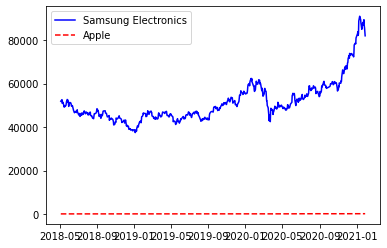

In [ ]:
# 5 ~ 8만원대의 삼성과 130달러 대의 애플

plt.plot(sec.index, sec.Close, 'b', label= 'Samsung Electronics')
plt.plot(aapl.index, aapl.Close, 'r--', label= 'Apple')
plt.legend(loc= 'best')

### 일간 변동률 (DPC : daily percent change)
오늘 변동률 = ( {오늘 종가} - {어제 종가} ) / {어제 종가} * 100

In [ ]:
print(sec['Close'])

# 전체 데이터가 n행씩 뒤로밀림
sec['Close'].shift(1)

Date
2018-05-04    51900.0
2018-05-08    52600.0
2018-05-09    50900.0
2018-05-10    51600.0
2018-05-11    51300.0
               ...   
2021-01-25    89400.0
2021-01-26    86700.0
2021-01-27    85600.0
2021-01-28    83700.0
2021-01-29    82000.0
Name: Close, Length: 672, dtype: float64


Date
2018-05-04        NaN
2018-05-08    51900.0
2018-05-09    52600.0
2018-05-10    50900.0
2018-05-11    51600.0
               ...   
2021-01-25    86800.0
2021-01-26    89400.0
2021-01-27    86700.0
2021-01-28    85600.0
2021-01-29    83700.0
Name: Close, Length: 672, dtype: float64

In [ ]:
# dpc 구하기 / nan은 나중을 위해 0으로 환산
sec_dpc = (sec['Close'] / sec['Close'].shift(1) - 1) * 100
sec_dpc = sec_dpc.fillna(0)

aapl_dpc = (aapl['Close'] / aapl['Close'].shift(1) - 1) * 100
aapl_dpc = aapl_dpc.fillna(0)
aapl_dpc

Date
2018-05-04    0.000000
2018-05-07    0.723496
2018-05-08    0.480665
2018-05-09    0.704110
2018-05-10    1.430397
                ...   
2021-01-25    2.768383
2021-01-26    0.167930
2021-01-27   -0.768375
2021-01-28   -3.498523
2021-01-29   -3.742060
Name: Close, Length: 690, dtype: float64

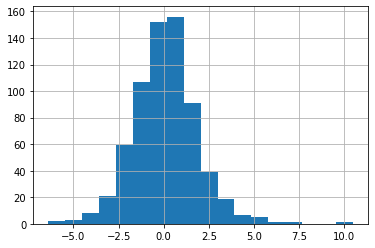

count    672.000000
mean       0.083898
std        1.783776
min       -6.387665
25%       -0.997182
50%        0.104056
75%        1.061010
max       10.470588
Name: Close, dtype: float64

In [ ]:
# 주가 수익률이 급첨 분포를 나타낸다는 것은 정규분포와 비교했을 때 주가의 움직임이 대부분 매우 작은 범위 안에서 발생한다는 것을 의미

plt.hist(sec_dpc, bins= 18)
plt.grid(True)
plt.show()

sec_dpc.describe()

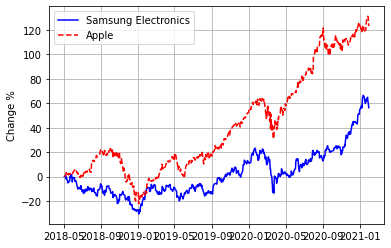

In [ ]:
# 일간 변동률 누적합을 통한 비교

plt.plot(sec.index, sec_dpc.cumsum(), 'b', label= 'Samsung Electronics')
plt.plot(aapl.index, aapl_dpc.cumsum(), 'r--', label= 'Apple')
plt.ylabel('Change %')
plt.grid(True)
plt.legend(loc= 'best')
plt.show()

### 최대 손실 낙폭 (MDD : Maximum DrawDown)

특정 기간에 발생한 최고점에서 최저점까지의 가장 큰 손실을 의미한다.<br>
퀀트 투자에서는 수익률을 높이는 것보다 MDD를 낮추는 것이 더 낫다고 할 만큼 중요한 지표로서,<br> 특정 기간 동안 최대한 얼마의 손실이 날 수 있는지 나타냄

#### 한국종합주가지수 (KOSPI : Korea Composite Stock Price Index)
1983년부터 발표, 발표기점에 (상장된 모든 종목의 시가 총액을 기준 지수 100포인트로 집계)
ex) KOSPI지수 2500일시 한국증시가 1980년 당시보다 25배가 올랐음을 나타냄

[*********************100%***********************]  1 of 1 completed


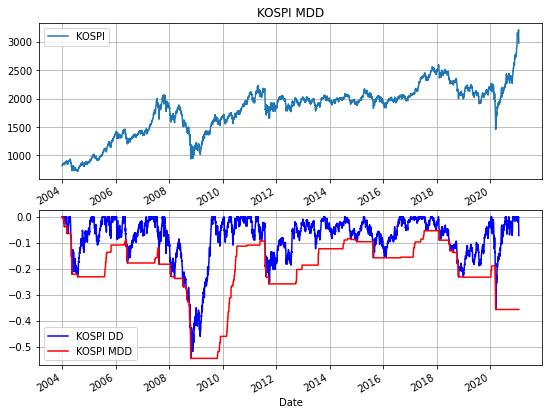

In [ ]:
# KOSPI의 MDD 구하기

kospi = pdr.get_data_yahoo('^KS11', '2004-01-04')

window = 252 # 1년 동안의 개장일 근사값
peak = kospi['Adj Close'].rolling(window, min_periods= 1).max()
drawdown = kospi['Adj Close'] / peak - 1.0
max_dd = drawdown.rolling(window, min_periods= 1).min()

plt.figure(figsize= (9, 7))
plt.subplot(211)
kospi['Close'].plot(label= 'KOSPI', title= 'KOSPI MDD', grid= True, legend= True)

plt.subplot(212)
drawdown.plot(c= 'blue', label= 'KOSPI DD', grid= True, legend= True)
max_dd.plot(c= 'red', label= 'KOSPI MDD', grid= True, legend= True)
plt.show()

In [ ]:
# 서브프라임 금융 위기 당시 2008년 코스피 지수가 10.57% 하락하며 MDD가 -54.5%를 기록했다

max_dd.min()

-0.5453665130144085

In [ ]:
max_dd[max_dd == -0.5453665130144085] # or 숫자대신 max_dd.min()로 기입해도 된다

Date
2008-10-24   -0.545367
2008-10-27   -0.545367
2008-10-28   -0.545367
2008-10-29   -0.545367
2008-10-30   -0.545367
                ...   
2009-10-16   -0.545367
2009-10-19   -0.545367
2009-10-20   -0.545367
2009-10-21   -0.545367
2009-10-22   -0.545367
Name: Adj Close, Length: 252, dtype: float64

### KOSPI와 다우존스 지수 비교
국내 주식과 미국 주식의 상관관계를 비교해보자

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


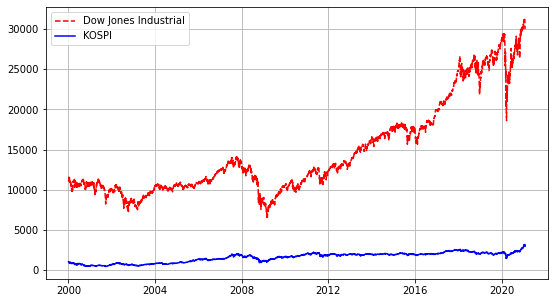

In [ ]:
# 일별 종가만으로는 상관관계를 비교하기 어렵다

dow = pdr.get_data_yahoo('^DJI', '2000-01-04')
kospi = pdr.get_data_yahoo('^KS11', '2000-01-04')

plt.figure(figsize= [9,5])
plt.plot(dow.index, dow.Close, 'r--', label= 'Dow Jones Industrial')
plt.plot(kospi.index, kospi.Close, 'b', label= 'KOSPI')
plt.grid(True)
plt.legend(loc= 'best')
plt.show()

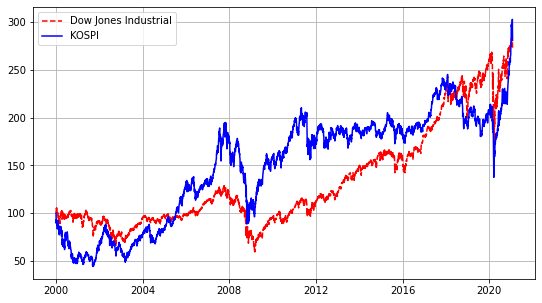

In [ ]:
# 지수화 : 오늘종가를 특정일 종가로 나눈뒤 100을 곱하면 특정일 종가 대비 오늘의 변동률이 나온다
# 일간 변동률의 누적합보다 더 수월하게 처리 가능하다

d = (dow.Close / dow.Close.loc['2000-01-04']) * 100
k = (kospi.Close / kospi.Close.loc['2000-01-04']) * 100

plt.figure(figsize= [9,5])
plt.plot(d.index, d, 'r--', label= 'Dow Jones Industrial')
plt.plot(k.index, k, 'b', label= 'KOSPI')
plt.grid(True)
plt.legend(loc= 'best')
plt.show()

지수화를 하고 나니, 지난 20년간 KOSPI의 상승률이 다우존스 지수의 상승률과 엇비슷했음을 확인할 수 있다.

In [ ]:
df = pd.DataFrame({'DOW' : dow['Close'], 'KOSPI' : kospi['Close']})
print(df.isna().sum()) # 결측값 확인
df = df.fillna(method= 'bfill') # 결측값을 없애거나, 0으로 처리하기엔 너무 위험하다. 고로, 뒤에있는 값으로 채우자
df

DOW      159
KOSPI    265
dtype: int64


,DOW,KOSPI
Date,,
2000-01-04,10997.929688,1059.040039
2000-01-05,11122.650391,986.309998
2000-01-06,11253.259766,960.789978
2000-01-07,11522.559570,948.650024
2000-01-10,11572.200195,987.239990
...,...,...
2021-01-25,30960.000000,3208.989990
2021-01-26,30937.039062,3140.310059
2021-01-27,30303.169922,3122.560059


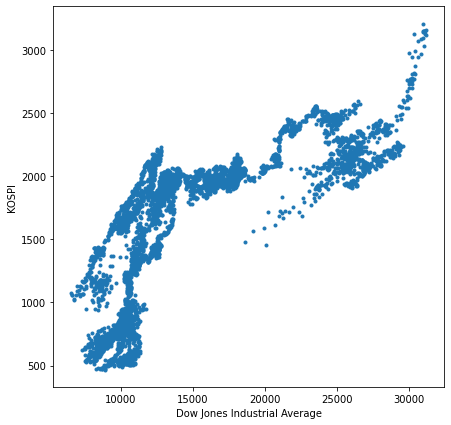

In [ ]:
# 다우존스와 KOSPI의 산점도 분석

plt.figure(figsize = [7, 7])
plt.scatter(df['DOW'], df['KOSPI'], marker= '.')
plt.xlabel('Dow Jones Industrial Average')
plt.ylabel('KOSPI')
plt.show()

별로 상관관계가 없어보인다

In [ ]:
slope, intercept, rvalue, pvalue, stderr = regr = st.linregress(df['DOW'], df['KOSPI'])

print('기울기 :', slope)
print('y절편 :', intercept)
print('r값(상관계수) :', rvalue)
print('p값 :', pvalue)
print('표준편차 :', stderr)

기울기 : 0.07743946181845504
y절편 : 450.4590045236009
r값(상관계수) : 0.7628762131483778
p값 : 0.0
표준편차 : 0.0008882805959022275


In [ ]:
# df로 상관계수 구하기
df.corr()

,DOW,KOSPI
DOW,1.000000,0.762876
KOSPI,0.762876,1.000000


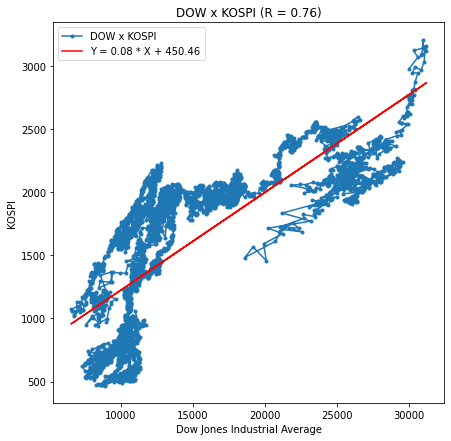

In [ ]:
# 다우존스와 KOSPI의 회귀 분석
df = pd.DataFrame({'X' : dow['Close'], 'Y' : kospi['Close']})
df = df.fillna(method= 'bfill')
df = df.fillna(method= 'ffill')

regr = st.linregress(df.X, df.Y)
regr_line = f'Y = {regr.slope:.2f} * X + {regr.intercept:.2f}'

plt.figure(figsize = [7, 7])
plt.plot(df.X, df.Y, marker= '.')
plt.plot(df.X, regr.slope * df.X + regr.intercept, 'r')

plt.legend(['DOW x KOSPI', regr_line])
plt.title(f'DOW x KOSPI (R = {regr.rvalue:.2f})')
plt.xlabel('Dow Jones Industrial Average')
plt.ylabel('KOSPI')
plt.show()

다우존스 지수와 KOSPI 지수의 상관관계가 0.76으로 확인되었다

두 자산에 분산 투자를 할 경우 약간의 리스크 완화 효과를 기대할 수 있다.

# 핵심요약
- 가격대가 다른 두 주식 종목의 수익률을 비교하려면 종가 대신 일간 변동률의 누적합을 구해서 비교할수 있고,<br> 지수화를 사용할 시 더 수월하게 처리할 수 있다.

- 수익률을 높이는 것 만큼이나 MDD를 낮추는 것이 중요하다.

- 회귀 분석은 데이터의 상관관계를 분석하는 데 많이 쓰이는 통계 분석 방법이다.<br>회귀식을 구한 뒤 임의의 독립변수에 대하여 종속변수의 값을 추측해볼 수 있는데, 이를 예측이라 한다.

- 오늘의 종가를 특정일의 종가로 나눈 뒤 100을 곱하면, 특정일의 종가 대비 오늘의 변동률을 구할 수 있다. 이렇게 가격이 다른 두 주식 종목의 수익률을 비교하는 방법을 지수화 라고한다.

Chapter 3 ㄲㅡㅌ..